# Brexit

In [1]:
import geopandas
import topojson
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display_markdown

display_markdown(open("README.md").read(), raw=True)

# Brexit
## Brexit dataset

This dataset contains results for the Brexit vote at the local authority district, and administrative boundaries.

## `brexit_vote.csv`

- `Source`: Electoral Commission
- `URL`

> [http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv](http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv)

- `Processing`: no processing was required for this dataset, see original source for additional information

## Local Authority District boundaries

- `Source`: Office for National Statistics
- `URL`

> [https://data.gov.uk/dataset/1261032e-c683-4408-a82d-37281d0e250d/local-authority-districts-december-2016-full-clipped-boundaries-in-great-britain](https://data.gov.uk/dataset/1261032e-c683-4408-a82d-37281d0e250d/local-authority-districts-december-2016-full-clipped-boundaries-in-great-britain)

- `Processing`: no processing was required for this dataset, see original source for additional information


## Local Authority District (LAD) geometries

The original geometries are downloaded from the Office of National Statistics through [`data.gov.uk`](https://data.gov.uk/dataset/1261032e-c683-4408-a82d-37281d0e250d/local-authority-districts-december-2016-full-clipped-boundaries-in-great-britain) and stored locally:

In [3]:
lads = geopandas.read_file('./Local_Authority_Districts_December_2016_'
                           'Generalised_Clipped_Boundaries_in_the_UK_WGS84/'
                           'Local_Authority_Districts_December_2016_'
                           'Generalised_Clipped_Boundaries_in_the_UK_WGS84.shp'
                          )

## Topology simplification

To obtain a much more lightweight set of geometries, we simplify the layer, respecting its topology. First we build the topology:

In [4]:
topology = topojson.Topology(lads)

Then simplify it:

In [5]:
simple_uk = topology.toposimplify(.025)

Inspect the resulting geography:

<AxesSubplot:>

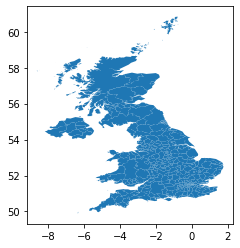

In [6]:
simple_uk.to_gdf().plot()

And we can write it to a GeoJSON file:

In [7]:
simple_uk.to_gdf().to_file('./local_authority_districts.geojson', driver="GeoJSON")

---

## Download link

- {download}`[Download the simplified LAD geometries as a GeoJSON] <local_authority_districts.geojson>`
- {download}`[Download the EU referendum vote results as a CSV] <brexit_vote.csv>`